In [3]:
import pandas as pd
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
TwGames = pd.read_csv('Twitch_game_data.csv')
TwGlobal = pd.read_csv('Twitch_global_data.csv')
TwUsers = pd.read_csv('Twitch_user_data.csv')

In [61]:
TwGlobal

,year,Month,Hours_watched,Avg_viewers,Peak_viewers,Streams,Avg_channels,Games_streamed
0,2016,1,480241904,646355,1275257,7701675,20076,12149
1,2016,2,441859897,635769,1308032,7038520,20427,12134
2,2016,3,490669308,660389,1591551,7390957,20271,12234
3,2016,4,377975447,525696,1775120,6869719,16791,12282
4,2016,5,449836631,605432,1438962,7535519,19394,12424
...,...,...,...,...,...,...,...,...
59,2020,12,1877319317,2526674,4860624,22089295,107006,32840
60,2021,1,2173794168,2925698,6516666,25614207,119448,34551
61,2021,2,1979581961,2950196,5274617,24319608,122763,34594
62,2021,3,2173794168,2925698,6516666,25614207,119448,34551


In [72]:
TwGames

,Rank,Game,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
0,1,League of Legends,1,2016,94377226,1362044,530270,2903,129172,127021,1833,69.29
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105,372654,2197,120849,64378,1117,57.62
2,3,Dota 2,1,2016,45185893,433397,315083,1100,44074,60815,583,104.26
3,4,Hearthstone,1,2016,39936159,235903,131357,517,36170,53749,317,169.29
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578,71639,3620,214054,21740,1549,14.03
...,...,...,...,...,...,...,...,...,...,...,...,...
12745,196,Cuphead,4,2021,795329,31721,90364,98,7795,1106,44,25.07
12746,197,Hades,4,2021,794472,52755,36447,152,8663,1104,73,15.06
12747,198,Epic Seven,4,2021,778750,18362,11670,47,997,1083,25,42.41
12748,199,Pok<U+00E9>mon Platinum,4,2021,777305,22380,61580,76,2837,1081,31,34.73


### Grafico de barras

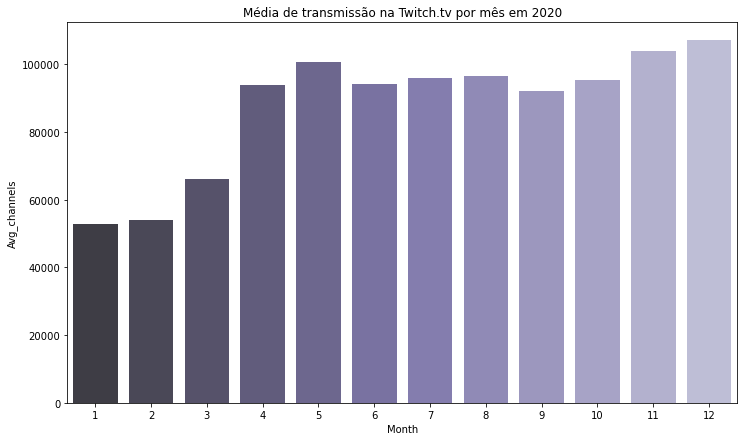

In [18]:
transmissao = TwGlobal.loc[TwGlobal["year"] == 2020]
transmissao
plt.figure(figsize = (12,7))
grafico = sns.barplot(x = "Month" , y = "Avg_channels", data=transmissao,palette = "Purples_d" )
grafico.set_title("Média de transmissão na Twitch.tv por mês em 2020")
plt.show()

### Grafico de Linha

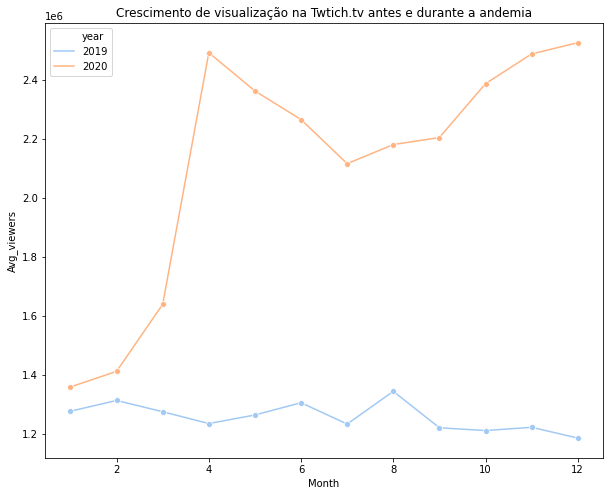

In [5]:
sem_2021 = TwGlobal.loc[TwGlobal["year"] <= 2020]
ano_2019_2020 = sem_2021.loc[sem_2021["year"] >= 2019]
plt.figure(figsize = (10,8))
x = sns.lineplot(data=ano_2019_2020, x="Month", y="Avg_viewers",hue = "year",marker="o",palette = "pastel")
x.set_title("Crescimento de visualização na Twtich.tv antes e durante a andemia")
plt.show()

### Grafico de Disperssão

<ipython-input-10-62bceea82035>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sem_2021['disperção'] = disperção


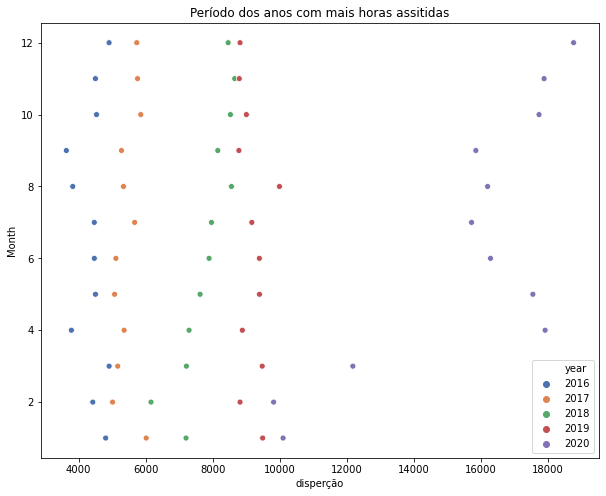

In [10]:
disperção = sem_2021["Hours_watched"]/100000
pd.options.display.float_format = '{:.2f}'.format
sem_2021['disperção'] = disperção
plt.figure(figsize = (10,8))
d = sns.scatterplot(data=sem_2021, x= "disperção", y="Month", hue="year",palette="deep")
d.set_title("Período dos anos com mais horas assitidas")
plt.show()

<ipython-input-14-eb5d76c0fa54>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sem_2021['peak'] = peak
<ipython-input-14-eb5d76c0fa54>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sem_2021['avg'] = avg


<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 720x720 with 0 Axes>

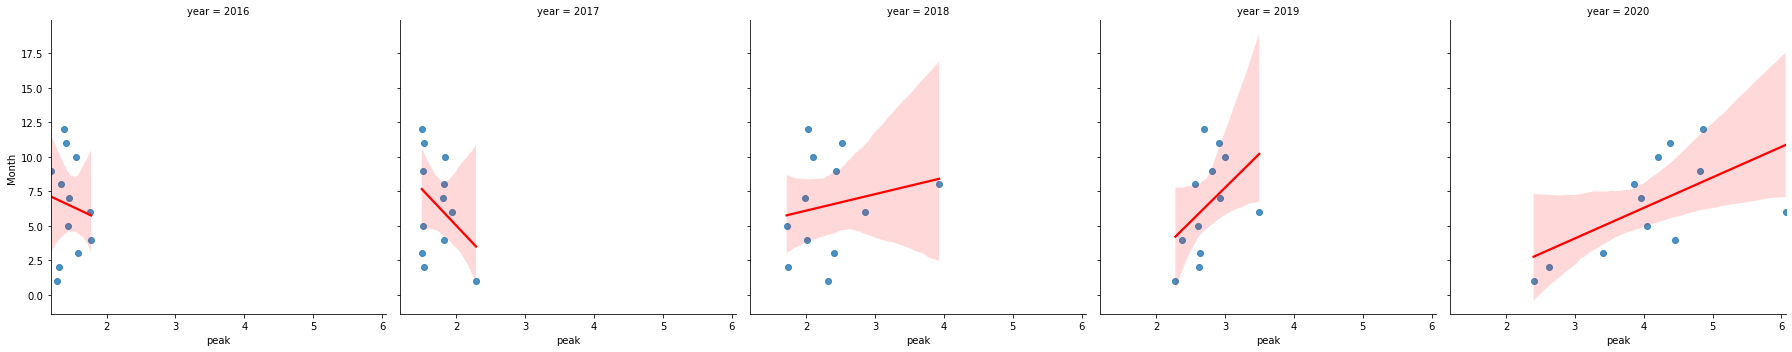

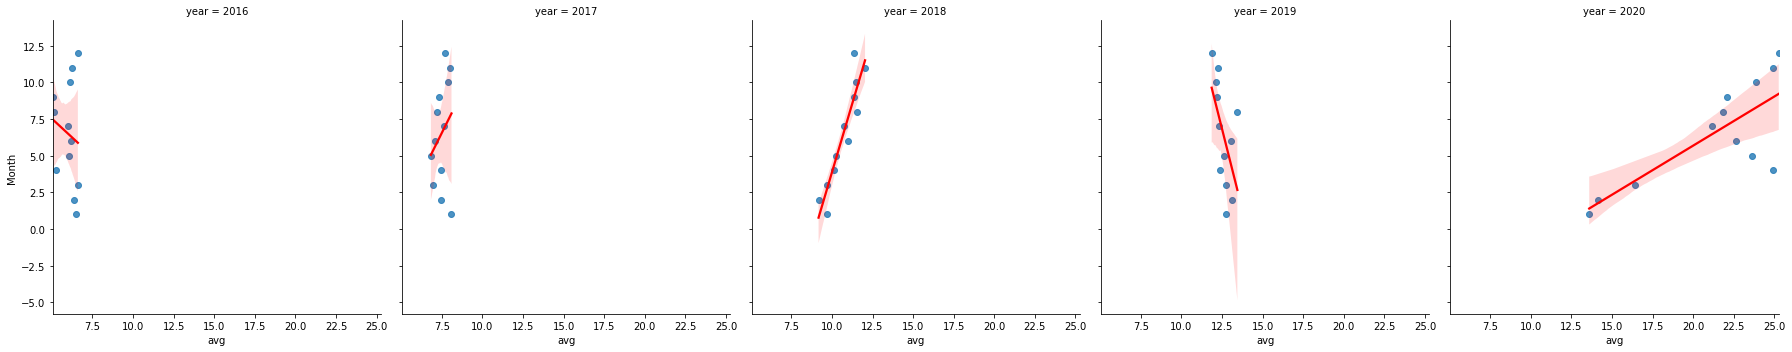

In [14]:
avg = sem_2021["Avg_viewers"]/100000
pd.options.display.float_format = '{:.2f}'.format
peak = sem_2021["Peak_viewers"]/1000000
pd.options.display.float_format = '{:.2f}'.format
sem_2021['peak'] = peak
sem_2021['avg'] = avg
plt.figure(figsize = (10,10))
n = sns.lmplot(data = sem_2021 , x = "peak" , y = "Month" , line_kws = {"color" : "red"}, col = "year")
m = sns.lmplot(data = sem_2021 , x = "avg" , y = "Month", line_kws = {"color" : "red"}, col = "year")
plt.show